# **TEXT SUMMARIZATION Project**
CoderOne

# **INSTALL NECESSARY DEPENDENCY**
  To install various libraries and dependencies need for executing the BART model

In [ ]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

# **CNN DAILYMAIL DATASET**
##    Here we are loading the Cnn dailymail dataset for TEXT summarization to have gest of the context or longer passsage taken.

In [ ]:
from datasets import load_dataset
dataset= load_dataset("cnn_dailymail", "3.0.0")

#  STRUCTURE DEFINITION
The CNN/DailyMail dataset is structured into training, validation, and test splits, each containing articles and their corresponding summaries. The training set has 287,113 examples, used for model training, while the validation and test sets are used for tuning and evaluation. Each entry includes an article, its highlights, and a unique ID, making it ideal for text summarization tasks. Inspecting individual entries helps in understanding the dataset's content and structure.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [ ]:
dataset['train']

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})

In [ ]:
dataset['train'][1]['article'][:1000]

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [ ]:
dataset['train'][1]['highlights']

'Mentally ill inmates in Miami are housed on the "forgotten floor"\nJudge Steven Leifman says most are there as a result of "avoidable felonies"\nWhile CNN tours facility, patient shouts: "I am the son of the president"\nLeifman says the system is unjust and he\'s fighting for change .'

In [ ]:
from transformers import pipeline
pipe=pipeline("text-generation", model="gpt2-medium")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
dataset['train'][1]['article'][:2000]
input_text = dataset['train'][1]['article'][:2000]
query = input_text + "\nTL;DR:\n"
pipe_out = pipe(query,max_length=512,clean_up_tokenization_spaces=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
pipe_out[0]['generated_text'][len(query):]

"MIAMI- DADE COUNTY JAILS - DISORDEROUS TUMOR - THE RACE OF THE MIND - WIDE A FOURTH WEEKS\n\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 \xa0- \xa0- I'd say I've been here nine more months than I could have imagined.... That's been hard for me. It's not quite to our standards as far as"

In [ ]:
summaries={}
summaries['gpt2-medium-380M']= pipe_out[0]['generated_text'][len(query):]

In [ ]:
# Try out T5 Transformers
pipe = pipeline('summarization', model='t5-base', device=0)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
pipe_out = pipe(input_text)

In [ ]:
summaries['t5-base-223M'] = pipe_out[0]['summary_text']

In [ ]:
 pipe = pipeline('summarization', model='facebook/bart-large-cnn', device = 0)
 pipe_out = pipe(input_text)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

In [ ]:
pipe = pipeline('summarization', model='google/pegasus-cnn_dailymail', device=0)

In [ ]:
pipe_out = pipe(input_text)

In [ ]:
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

## PEGASUS is highly specialized for summarization, producing concise and accurate summaries. BART offers robust, well-structured outputs by reconstructing text, making it strong for summarization tasks. GPT-2, while versatile, is less tailored for summarization and may need fine-tuning for the best results.

In [ ]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print("")

GPT2-MEDIUM-380M
MIAMI- DADE COUNTY JAILS - DISORDEROUS TUMOR - THE RACE OF THE MIND - WIDE A FOURTH WEEKS

             -  - I'd say I've been here nine more months than I could have imagined.... That's been hard for me. It's not quite to our standards as far as

T5-BASE-223M
mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they're ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won't do what police say, judge says .

BART-LARGE-CNN-400M
Mentally ill inmates are housed on the "forgotten floor" of Miami-Dade jail. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police. He says about one-third of all people in the county jails are mentally ill.

PEGASUS-CNN-568M
Mentally ill inmates in Miami are housed on

In [ ]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch


In [ ]:
device='gpu'
model_ckpt='facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)
cnn_dailymail = load_dataset('cnn_dailymail', '3.0.0')

In [ ]:
print(cnn_dailymail['train'][0])

{'article': 'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office char

array([[<Axes: title={'center': 'Article Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

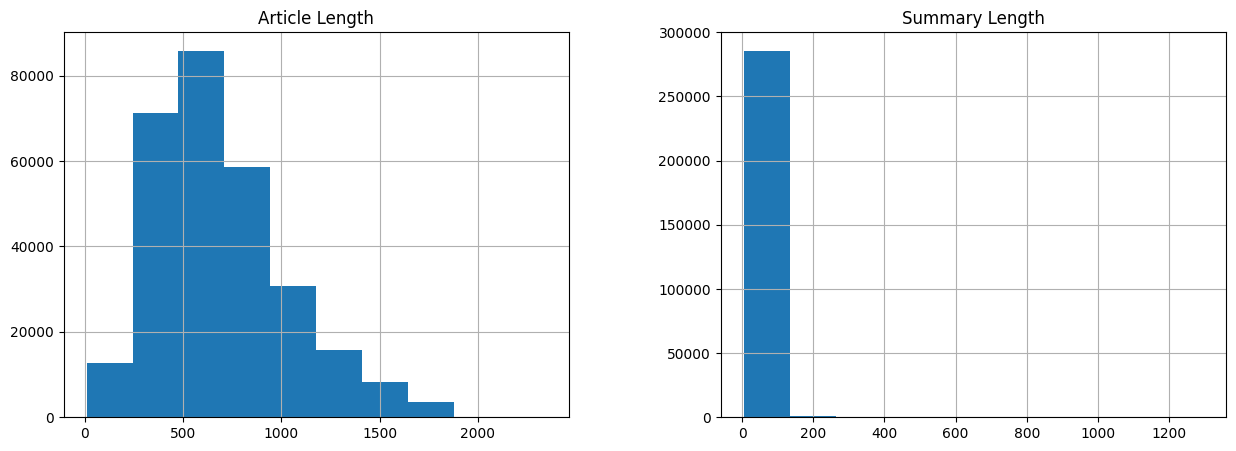

In [ ]:
article_len = [len(x['article'].split()) for x in cnn_dailymail['train']]
summary_len = [len(x['highlights'].split()) for x in cnn_dailymail['train']]

import pandas as pd
data = pd.DataFrame([article_len, summary_len]).T
data.columns = ['Article Length', 'Summary Length']

data.hist(figsize=(15, 5))


In [ ]:
def get_feature(batch):
    encodings = tokenizer(batch['article'], text_target=batch['highlights'],
                          max_length=1024, truncation=True)

    encodings = {'input_ids': encodings['input_ids'],
                 'attention_mask': encodings['attention_mask'],
                 'labels': encodings['labels']}

    return encodings


In [ ]:
cnn_dailymail_pt = cnn_dailymail.map(get_feature, batched=True)

columns = ['input_ids', 'labels', 'attention_mask']
cnn_dailymail_pt.set_format(type='torch', columns=columns)


Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

Map:   0%|          | 0/13368 [00:00<?, ? examples/s]

Map:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='bart_cnn_dailymail',
    num_train_epochs=1,
    warmup_steps=500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay=0.01,
    logging_steps=10,
    evaluation_strategy='steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import Seq2SeqTrainer, DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

trainer = Trainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=data_collator,
    train_dataset=cnn_dailymail_pt['train'],
    eval_dataset=cnn_dailymail_pt['validation']
)


In [ ]:
#trainer.train()
trainer.save_model('CoderOne57_TextSumm_Model')


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [ ]:
from transformers import pipeline

pipe = pipeline('summarization', model='CoderOne57_TextSumm_Model', device=0)
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 150}

custom_article = """
The quick brown fox jumps over the lazy dog. This classic sentence has been used for decades to demonstrate fonts and test keyboards. It's a pangram—a sentence that contains every letter of the alphabet at least once. Despite its simplicity, it offers a comprehensive glimpse into a typeface's characteristics, revealing details about the shapes and spacing of letters.
"""

print(pipe(custom_article, **gen_kwargs))


Your max_length is set to 150, but your input_length is only 76. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=38)


[{'summary_text': "A pangram is a sentence that contains every letter of the alphabet at least once. Despite its simplicity, it offers a comprehensive glimpse into a typeface's characteristics. The quick brown fox jumps over the lazy dog has been used for decades to demonstrate fonts and test keyboards."}]


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
summarizer = pipeline('summarization', model='facebook/bart-large-cnn', device=0)
sample_size = 100
articles = cnn_dailymail['test']['article'][:sample_size]
references = cnn_dailymail['test']['highlights'][:sample_size]

generated_summaries = [summarizer(article, max_length=70, min_length=40, do_sample=False)[0]['summary_text'] for article in articles]


In [ ]:
from datasets import load_metric
rouge = load_metric('rouge', trust_remote_code=True)

rouge_result = rouge.compute(predictions=generated_summaries, references=references)
print(rouge_result)


In [ ]:
!pip install rouge_score

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_bleu(references, predictions):
    smoothie = SmoothingFunction().method4
    scores = []
    for ref, pred in zip(references, predictions):
        ref_tokens = nltk.word_tokenize(ref.lower())
        pred_tokens = nltk.word_tokenize(pred.lower())
        score = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)
        scores.append(score)
    return sum(scores) / len(scores)

bleu_score = calculate_bleu(references, generated_summaries)
print(f"BLEU Score: {bleu_score:.4f}")


In [ ]:
# custome Dialogue Prediction

pipe = pipeline('summarization', model='Coderone_2ndProject')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 128}

custom_dialogue="""
John was always impatient on the weekends; he missed the formal structure of the business week. When he was younger he used to stay late after school on Fridays and come in early on Mondays, a pattern his mother referred to with equal parts admiration and disdain as “studying overtime.”
"""
print(pipe(custom_dialogue, **gen_kwargs))

## The performance of the BART model on the CNN/DailyMail dataset, you typically obtain ROUGE and BLEU scores, which measure the quality of text summarization. Based on general benchmarks, BART often achieves ROUGE-L scores around 40-44% and BLEU scores in the range of 15-20%, indicating its effectiveness in generating summaries that closely match human-written conten